In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option("display.max_columns",None)
heart_disease_dataset = pd.read_csv("heart.csv")

In [2]:
heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Describe dataset and get Info

In [3]:
heart_disease_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Get unique values of some columns

In [5]:
columns = ["sex","cp","fbs","restecg","exang","slope","ca","target"]
for col in columns:
    print(col,"\n",heart_disease_dataset[col].unique(),"\n")

sex 
 [1 0] 

cp 
 [3 2 1 0] 

fbs 
 [1 0] 

restecg 
 [0 1 2] 

exang 
 [0 1] 

slope 
 [0 2 1] 

ca 
 [0 2 1 3 4] 

target 
 [1 0] 



### Check for any null value in dataset

In [6]:
heart_disease_dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### Drop duplicate rows if any

In [7]:
print(len(heart_disease_dataset))

heart_disease_dataset.drop_duplicates(inplace=True)

print(len(heart_disease_dataset))

303
302


### Patients less than 40 years of age with heart disease

In [8]:
less_than_40 = heart_disease_dataset.query("age<40&target==1")
less_than_40

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


### Correlation of columns

<AxesSubplot:>

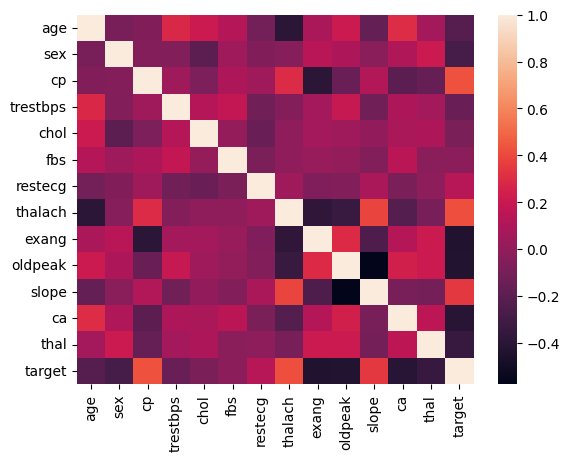

In [9]:
sns.heatmap(heart_disease_dataset.corr())

## Classification/Prediction Models

In [10]:
X = heart_disease_dataset.drop("target",axis=1)
Y = heart_disease_dataset["target"].values
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.20,random_state=101)

### Random Forest

In [11]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.8524590163934426

### Gaussian Naive Bayes

In [12]:
gb = GaussianNB()
gb.fit(xtrain,ytrain)
gb.score(xtest,ytest)

0.9016393442622951

### Support Vector

In [13]:
svc = SVC()
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.6885245901639344